In [1]:
from utils import * #you have to restart the kernel everytime you edit utils to import the changes into the nb 
import scipy
from scipy.stats import norm

In [3]:
folder_name = 'test6policy'
dir1 = "../output_data/wdir18/naive.bin"#"/Users/zakaryaelkhiyati/swimmers/i-eel/runs/bin/"+ folder_name +"/naive.bin" # naive+

In [4]:
num_cols = 52

In [5]:
file = open(dir1, 'r')
data = np.fromfile(file, dtype=float)

number_of_entries = int(data.shape[0]) // num_cols
data_reshaped = data.reshape(number_of_entries , num_cols)
data1 = data_reshaped[:, 0:4]
theta = data_reshaped[:, 4:42+4]
v = data_reshaped[:, 42+4:]
#data1 = data0.reshape(number_of_entries // 4, 4)
header = ['state', 'action', 'position', 'reward'] #header row
df = pd.DataFrame(data1, columns=header)
'''
data = data.reshape(number_of_entries, 7)# each second has its own row now
header = ['time', 'action', 'current_position', 'current_state', 'next_state', 'next_position', 'reward'] #header row
df = pd.DataFrame(data, columns=header) # naive+ with snapshots ... why not use directly the load_binary file function? there's no Q, few other minor differences
df1, Qs = load_from_binary_file(dir1) #naive+
df1['time'] = df1['step'] // 2000 #add time column
df = df.convert_dtypes()
df1 = df1.convert_dtypes()
new_df = pd.merge(df, df1,  how='right', left_on=['time','action'], right_on = ['time','action'])#merge naive+ and naive+ with snaps for sanity checks
'''

"\ndata = data.reshape(number_of_entries, 7)# each second has its own row now\nheader = ['time', 'action', 'current_position', 'current_state', 'next_state', 'next_position', 'reward'] #header row\ndf = pd.DataFrame(data, columns=header) # naive+ with snapshots ... why not use directly the load_binary file function? there's no Q, few other minor differences\ndf1, Qs = load_from_binary_file(dir1) #naive+\ndf1['time'] = df1['step'] // 2000 #add time column\ndf = df.convert_dtypes()\ndf1 = df1.convert_dtypes()\nnew_df = pd.merge(df, df1,  how='right', left_on=['time','action'], right_on = ['time','action'])#merge naive+ and naive+ with snaps for sanity checks\n"

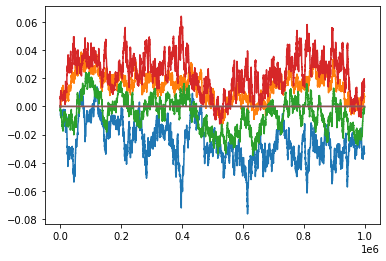

In [6]:
plt.plot(v)

In [7]:
theta.shape
thetas = np.zeros((theta.shape[0], 6, 7))
#Vs = np.zeros(v.shape[0], 6)

for i in range(theta.shape[0]):
    thetas[i] = theta[i].reshape(7, 6).T

In [8]:
Pi = np.zeros_like(thetas)
def compute_policy(theta):
    pi = np.exp(theta)
    for state in range(6):
        pi[state] = pi[state] / pi[state].sum()
    return pi

for i in range(theta.shape[0]):
    Pi[i] = compute_policy(thetas[i])

#np.round(compute_policy(theta[0].reshape(7, 6).T), 2)

In [9]:
print("initial policy: \n", np.round(Pi[0], 3))

print("policy after {} iterations: \n".format(number_of_entries), np.round(Pi[-1], 3))

initial policy: 
 [[0.901 0.017 0.017 0.017 0.017 0.017 0.017]
 [0.901 0.017 0.017 0.017 0.017 0.017 0.017]
 [0.901 0.017 0.017 0.017 0.017 0.017 0.017]
 [0.901 0.017 0.017 0.017 0.017 0.017 0.017]
 [0.017 0.017 0.017 0.017 0.017 0.017 0.901]
 [0.017 0.017 0.017 0.017 0.017 0.017 0.901]]
policy after 1000000 iterations: 
 [[0.934 0.013 0.013 0.015 0.01  0.009 0.007]
 [0.874 0.021 0.019 0.024 0.024 0.021 0.017]
 [0.94  0.011 0.01  0.01  0.009 0.009 0.011]
 [0.839 0.016 0.017 0.016 0.018 0.024 0.07 ]
 [0.017 0.017 0.017 0.017 0.017 0.017 0.901]
 [0.017 0.017 0.017 0.017 0.017 0.017 0.901]]


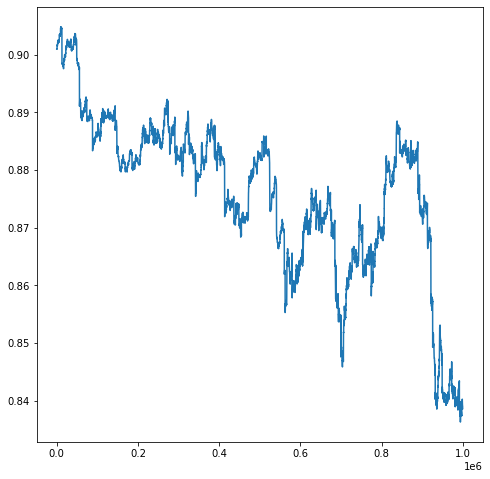

In [10]:
plt.figure(figsize=[8, 8])
plt.plot(Pi[:, 3,0])


<AxesSubplot:xlabel='reward', ylabel='Count'>

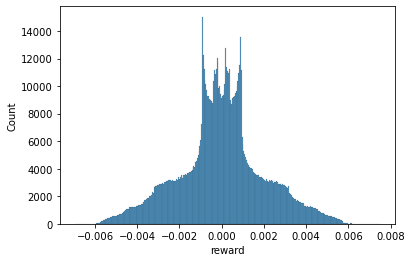

In [11]:
sns.histplot(data=df, x='reward')

In [12]:
data[:52]

array([ 3.00000000e+00,  0.00000000e+00, -3.83054561e-16,  0.00000000e+00,
        4.00000000e+00,  4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.00000000e+00,  4.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [14]:
num_cols = 52
n = data.shape[0] // num_cols
position = data.reshape(n, num_cols)[:, 2]
velocity = data.reshape(n, num_cols)[:, 3]

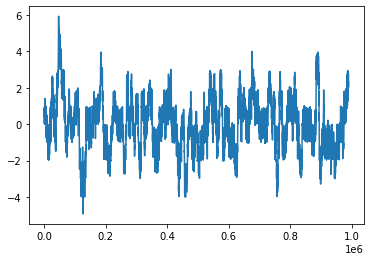

In [15]:
plt.plot(10000*moving_average(velocity, 10000))

In [16]:
mean_velocity = velocity.cumsum() / np.arange(1, velocity.shape[0]+1)

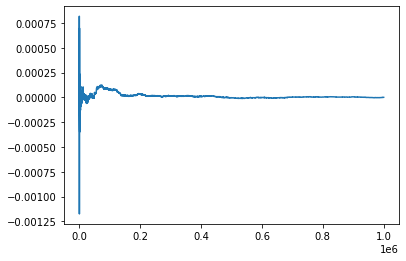

In [17]:
plt.plot(mean_velocity)


In [18]:
mean_velocity[-1]

4.990044769223598e-07

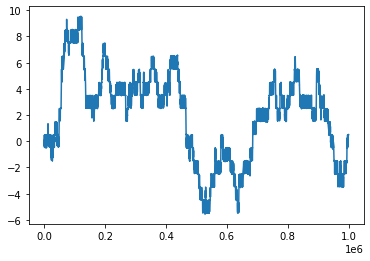

In [19]:
plt.plot(position)

In [20]:
position[-1]

0.49900447692235983

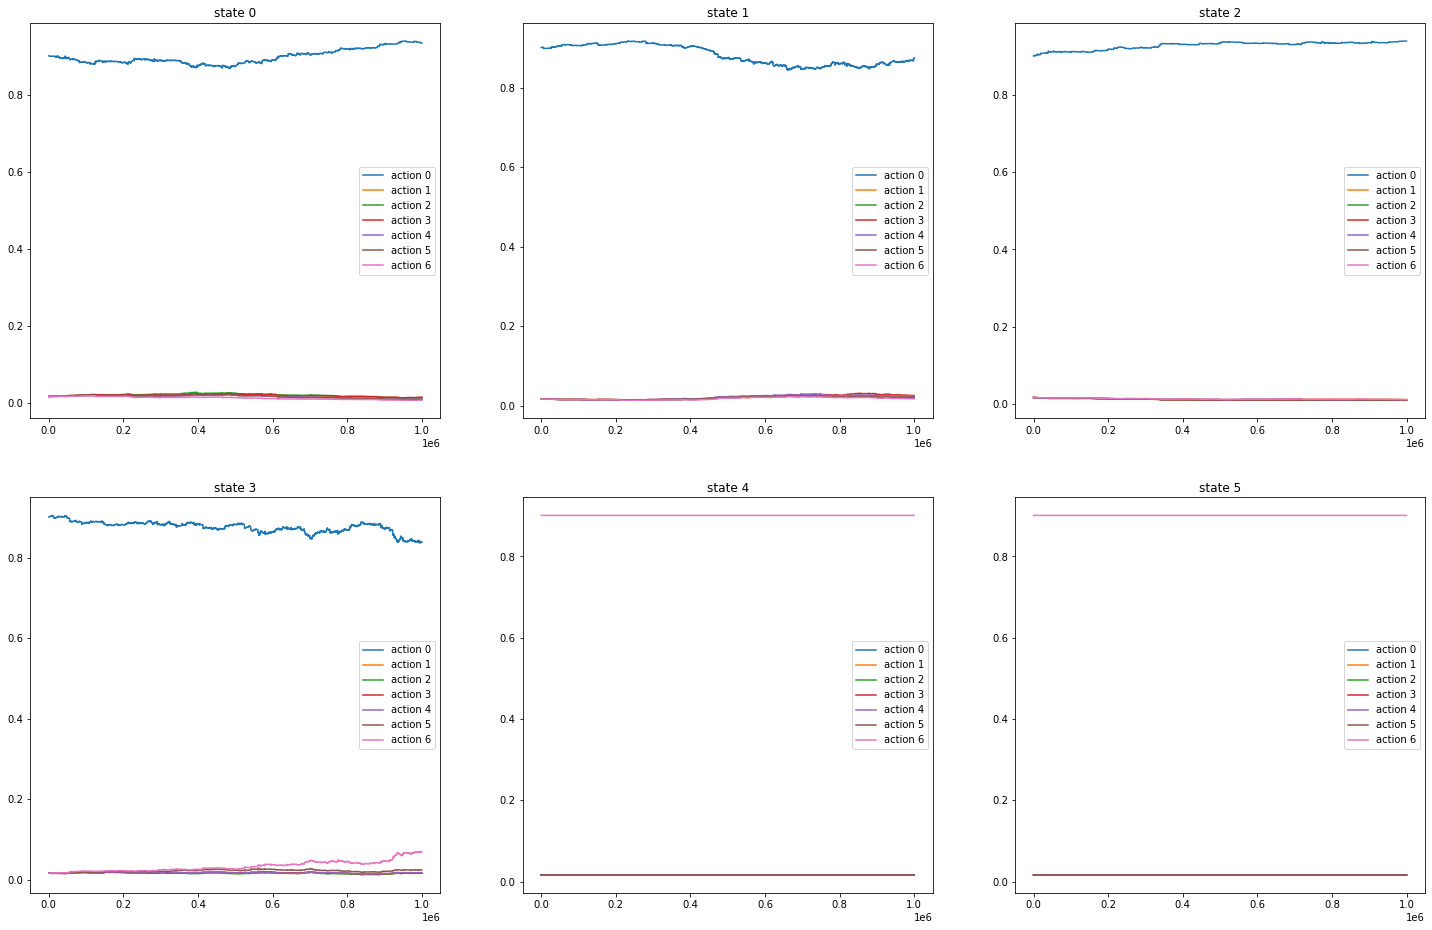

In [21]:
Qevol(Pi)

In [1098]:
#temps de passage de cellule i aà la cellule i+1

range_cells = int(np.floor(position[-1]))
jump_times = -np.ones(range_cells)
transit_times = -np.ones(range_cells)

for cell in range(range_cells):
    transit_times[cell] = (np.floor(position) == cell).sum()
    jump_times[cell] = (position >= cell).argmax()

df_transit = pd.DataFrame(transit_times)
df_jumps = pd.DataFrame(np.diff(jump_times))

<AxesSubplot:xlabel='0', ylabel='Count'>

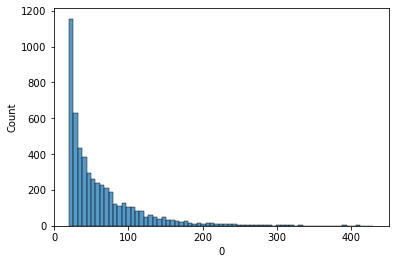

In [ ]:
sns.histplot(data=df_transit, x=0)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

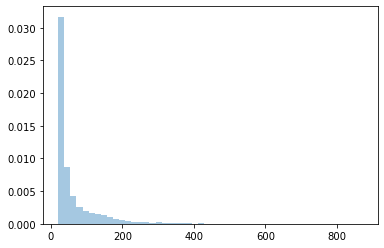

In [ ]:
sns.distplot(df_jumps, hist=True, kde=False, norm_hist=True)
#plt.yscale('log')
#plt.xscale('log')

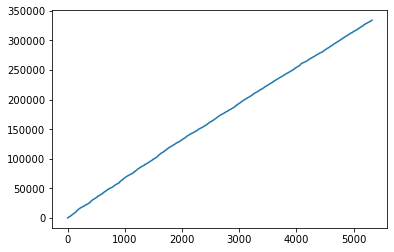

In [ ]:
plt.plot(jump_times)

(0.0, 100.0)

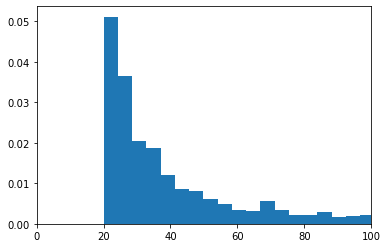

In [ ]:
hist = plt.hist(np.diff(jump_times), bins=200, density=True, cumulative=False)
plt.xlim(0, 100)


In [ ]:
hist

(array([5.11209560e-02, 3.63889462e-02, 2.03778099e-02, 1.88340364e-02,
        1.19532175e-02, 8.64513147e-03, 8.07172989e-03, 6.04277046e-03,
        4.94007512e-03, 3.48451728e-03, 3.04343914e-03, 5.73401577e-03,
        3.35219383e-03, 2.16128287e-03, 2.07306724e-03, 2.86700788e-03,
        1.76431254e-03, 1.94074380e-03, 2.24949849e-03, 2.07306724e-03,
        1.76431254e-03, 1.14680315e-03, 1.80842036e-03, 2.07306724e-03,
        1.45555785e-03, 1.45555785e-03, 1.58788129e-03, 1.72020473e-03,
        1.14680315e-03, 1.67609692e-03, 1.58788129e-03, 8.82156272e-04,
        1.32323441e-03, 1.10269534e-03, 9.26264086e-04, 5.29293763e-04,
        6.61617204e-04, 6.61617204e-04, 8.82156272e-04, 5.29293763e-04,
        3.52862509e-04, 6.61617204e-04, 7.05725018e-04, 6.61617204e-04,
        1.76431254e-04, 4.41078136e-04, 9.70371899e-04, 3.96970322e-04,
        3.96970322e-04, 2.20539068e-04, 3.96970322e-04, 3.08754695e-04,
        1.76431254e-04, 3.96970322e-04, 3.96970322e-04, 1.764312

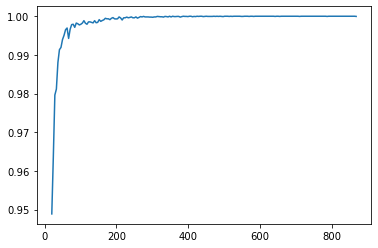

In [ ]:
plt.plot(hist[1][:-1], 1-hist[0])


In [ ]:
df_jumps.describe()

,0
count,5322.000000
mean,62.733183
std,68.761682
min,20.000000
25%,25.000000
50%,35.000000
75%,69.000000
max,872.000000


In [ ]:
df_transit.describe()

,0
count,5323.000000
mean,62.725531
std,50.603881
min,20.000000
25%,27.000000
50%,45.000000
75%,79.000000
max,430.000000


In [ ]:
hist

(array([5.11209560e-02, 3.63889462e-02, 2.03778099e-02, 1.88340364e-02,
        1.19532175e-02, 8.64513147e-03, 8.07172989e-03, 6.04277046e-03,
        4.94007512e-03, 3.48451728e-03, 3.04343914e-03, 5.73401577e-03,
        3.35219383e-03, 2.16128287e-03, 2.07306724e-03, 2.86700788e-03,
        1.76431254e-03, 1.94074380e-03, 2.24949849e-03, 2.07306724e-03,
        1.76431254e-03, 1.14680315e-03, 1.80842036e-03, 2.07306724e-03,
        1.45555785e-03, 1.45555785e-03, 1.58788129e-03, 1.72020473e-03,
        1.14680315e-03, 1.67609692e-03, 1.58788129e-03, 8.82156272e-04,
        1.32323441e-03, 1.10269534e-03, 9.26264086e-04, 5.29293763e-04,
        6.61617204e-04, 6.61617204e-04, 8.82156272e-04, 5.29293763e-04,
        3.52862509e-04, 6.61617204e-04, 7.05725018e-04, 6.61617204e-04,
        1.76431254e-04, 4.41078136e-04, 9.70371899e-04, 3.96970322e-04,
        3.96970322e-04, 2.20539068e-04, 3.96970322e-04, 3.08754695e-04,
        1.76431254e-04, 3.96970322e-04, 3.96970322e-04, 1.764312

In [ ]:
df_jumps.describe()

,0
count,5322.000000
mean,62.733183
std,68.761682
min,20.000000
25%,25.000000
50%,35.000000
75%,69.000000
max,872.000000


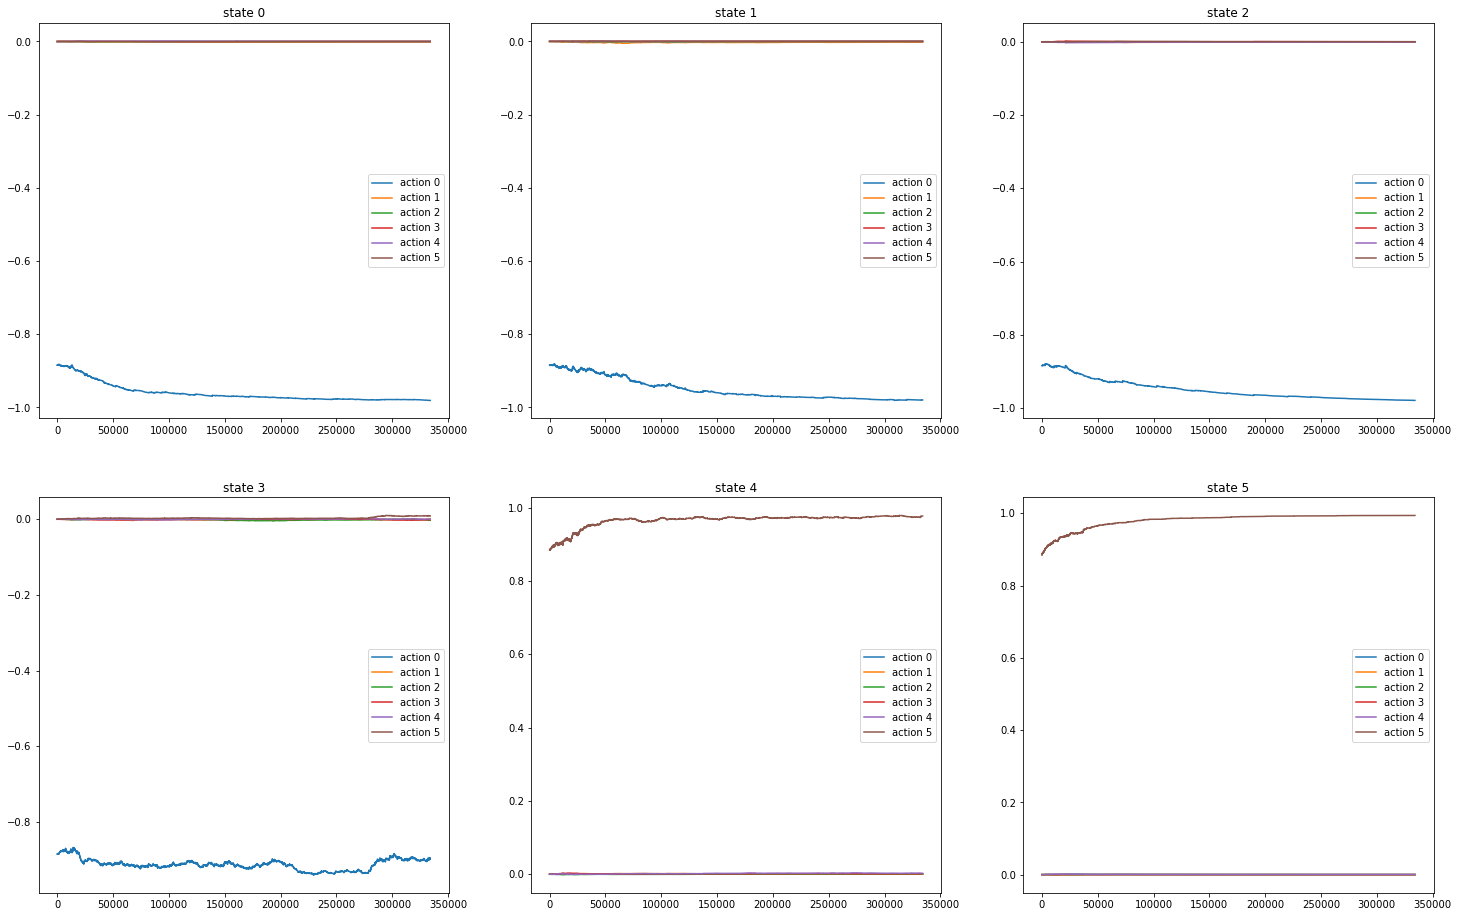

In [ ]:
Qevol(np.diff(Pi))

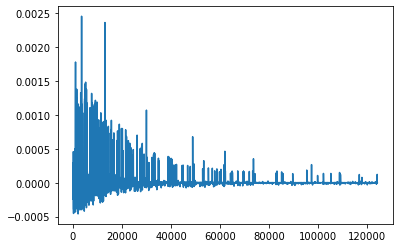

In [ ]:
diff = np.diff(Pi, axis=0)
prob = diff[:, -1, -1]
plt.plot(prob[prob!=0])

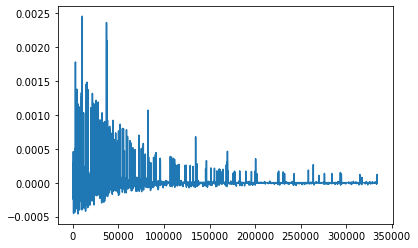

In [ ]:
plt.plot(prob)